# Import Libraries and CSV Files

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("selectfoodbalances2021.csv")
df2 = pd.read_csv("gdp2021.csv")
df3 = pd.read_csv("annualpopulation2021.csv")
df4 = pd.read_csv('proteinsupply2021.csv')

# Calculate Population percentage change 2020-21

In [2]:
pop = df3.drop(columns=["Domain","Domain Code","Area Code (M49)","Element Code","Element","Item Code (FBS)","Year Code","Flag","Flag Description"]).rename(columns={"Value":"Population","Area":"Country"})

In [3]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     370 non-null    object 
 1   Item        370 non-null    object 
 2   Year        370 non-null    int64  
 3   Unit        370 non-null    object 
 4   Population  370 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.6+ KB


In [4]:
pop2020 = pop.groupby(by="Year").get_group(2020).Population.values
pop2021 = pop.groupby(by="Year").get_group(2021).Population.values

In [5]:
deltapop2021=pop.groupby(by="Year").get_group(2021).drop(columns=["Population","Item","Year","Unit"])

In [6]:
deltapop2021["deltapop%"]=(((pop2021-pop2020)/pop2020)*100)
deltapop2021

,Country,deltapop%
1,Afghanistan,2.892393
3,Albania,-0.423461
5,Algeria,1.671512
7,Angola,3.216657
9,Antigua and Barbuda,0.604360
...,...,...
361,Venezuela (Bolivarian Republic of),-1.019921
363,Viet Nam,0.847761
365,Yemen,2.160788
367,Zambia,2.881541


In [7]:
deltapop2021.to_csv('popchg.csv', index=False) 

# Calculate animal protein proportion to the total amount of proteins available in the country.

In [8]:
sub4 = df4[["Year","Area","Element","Item","Value","Unit"]]
animalprotein2021 = sub4.dropna(axis=0)
animalprotein2021=(animalprotein2021.groupby(by="Item").get_group("Animal Products"))

In [9]:
totalprotein=(sub4.groupby(by="Item").get_group("Grand Total"))

In [10]:
animal_protein_proportion_2021=sub4.groupby(by="Item").get_group("Grand Total")
animal_protein_proportion_2021["Animal_Protein_Proportion"]=(animalprotein2021.Value.values/totalprotein.Value.values)*100

C:\Users\dinad\AppData\Local\Temp\ipykernel_12088\89987015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_protein_proportion_2021["Animal_Protein_Proportion"]=(animalprotein2021.Value.values/totalprotein.Value.values)*100


In [11]:
animal_protein_proportion_2021 = animal_protein_proportion_2021.drop(columns=["Item","Element","Unit","Value"]).round(2).rename(columns={"Area": "Country"})

In [12]:
animal_protein_proportion_2021

,Year,Country,Animal_Protein_Proportion
0,2021,Afghanistan,17.27
2,2021,Albania,55.52
4,2021,Algeria,27.96
6,2021,Angola,29.76
8,2021,Antigua and Barbuda,70.27
...,...,...,...
360,2021,Venezuela (Bolivarian Republic of),47.24
362,2021,Viet Nam,41.08
364,2021,Yemen,21.64
366,2021,Zambia,28.84


In [13]:
animal_protein_proportion_2021.to_csv('aniprot.csv', index=False) 

# Calculate protein balance in g/cap/day and food supply in kcal/cap/day

In [14]:
protein_bal = totalprotein[["Area","Value"]]
protein_bal = protein_bal.rename(columns={"Area": "Country","Value":"Protein_gr/cap/day"})
protein_bal

,Country,Protein_gr/cap/day
0,Afghanistan,60.70
2,Albania,120.13
4,Algeria,93.74
6,Angola,46.78
8,Antigua and Barbuda,89.45
...,...,...
360,Venezuela (Bolivarian Republic of),62.57
362,Viet Nam,96.90
364,Yemen,61.10
366,Zambia,46.74


In [15]:
pivot_1 = pd.pivot_table(df1, index=['Area'], columns=['Element'], values='Value',aggfunc="sum", fill_value=0)
foodsupply_bal = pivot_1.drop(columns=["Production","Protein supply quantity (g/capita/day)","Total Population - Both sexes"])

In [16]:
foodsupply_bal=foodsupply_bal.reset_index().rename(columns={"Area": "Country"})

In [17]:
fb = protein_bal.merge(foodsupply_bal,left_on='Country',right_on='Country')

In [18]:
fb_1 = animal_protein_proportion_2021.merge(fb,left_on='Country',right_on='Country')
fb_1

,Year,Country,Animal_Protein_Proportion,Protein_gr/cap/day,Food supply (kcal/capita/day)
0,2021,Afghanistan,17.27,60.70,2374.77
1,2021,Albania,55.52,120.13,4520.92
2,2021,Algeria,27.96,93.74,3928.05
3,2021,Angola,29.76,46.78,2577.21
4,2021,Antigua and Barbuda,70.27,89.45,3426.09
...,...,...,...,...,...
180,2021,Venezuela (Bolivarian Republic of),47.24,62.57,2716.81
181,2021,Viet Nam,41.08,96.90,3603.18
182,2021,Yemen,21.64,61.10,2361.50
183,2021,Zambia,28.84,46.74,2384.21


# Calculate GDP percentage change 2020-2021

In [19]:
gdp = df2.drop(columns=["Domain","Domain Code","Area Code (M49)","Element Code","Element","Year Code","Flag","Flag Description","Note"]).rename(columns={"Value":"gdp_USD_mil","Area":"Country"})
gdp2021 = gdp.groupby(by="Year").get_group(2021).gdp_USD_mil.values
gdp2020 = gdp.groupby(by="Year").get_group(2020).gdp_USD_mil.values

In [20]:
deltagdp2021=gdp.groupby(by="Year").get_group(2021).drop(columns=["Item","Item Code","Year","Unit"]).rename(columns={"gdp_USD_mil":"2021_GDP_mil"})

In [21]:
deltagdp2021["GDP_delta_20-21"] = (gdp2021-gdp2020)/(gdp2020)*100

In [22]:
delta = deltapop2021.merge(deltagdp2021,left_on='Country',right_on='Country')

# Additional helpful information: Poultry meat balances

In [23]:
df5 = pd.read_csv("poultry2021.csv")

In [24]:
pivot_5 = pd.pivot_table(df5, index=['Area'], columns=['Element'], values='Value',aggfunc="sum", fill_value=0).reset_index()
poultry_meat_bal_2021 = pivot_5.rename(columns={"Area":"Country","Domestic supply quantity":"poultrymeat_domestic_supply_1000t","Export Quantity":"poultrymeat_export_1000t","Import Quantity":"poultrymeat_import_1000t","Production":"poultrymeat_production_1000t"})

In [25]:
poultry_meat_bal_2021

Element,Country,poultrymeat_domestic_supply_1000t,poultrymeat_export_1000t,poultrymeat_import_1000t,poultrymeat_production_1000t
0,Afghanistan,61,0,33,28
1,Albania,63,0,48,14
2,Algeria,258,0,0,258
3,Angola,286,0,246,40
4,Antigua and Barbuda,7,0,7,0
...,...,...,...,...,...
180,Venezuela (Bolivarian Republic of),459,0,17,442
181,Viet Nam,1913,11,221,1703
182,Yemen,354,0,148,206
183,Zambia,63,9,20,52


In [26]:
## merging fb_1 dataframe to poultry_meat_bal_2021 df
fbs = fb_1.merge(poultry_meat_bal_2021,left_on='Country',right_on='Country')

In [27]:
countries_data = fbs.merge(delta,left_on='Country',right_on='Country')

In [28]:
## Saving all merged data into one csv file
countries_data.to_csv('countriesdata.csv', index=False)

# Perform PCA

In [29]:
data = countries_data.drop(columns=["Year","Country"])
data

,Animal_Protein_Proportion,Protein_gr/cap/day,Food supply (kcal/capita/day),poultrymeat_domestic_supply_1000t,poultrymeat_export_1000t,poultrymeat_import_1000t,poultrymeat_production_1000t,deltapop%,2021_GDP_mil,GDP_delta_20-21
0,17.27,60.70,2374.77,61,0,33,28,2.892393,14939.009447,-25.836857
1,55.52,120.13,4520.92,63,0,48,14,-0.423461,18260.043500,20.672779
2,27.96,93.74,3928.05,258,0,0,258,1.671512,163472.801517,12.164696
3,29.76,46.78,2577.21,286,0,246,40,3.216657,70533.243177,28.660805
4,70.27,89.45,3426.09,7,0,7,0,0.604360,1421.200000,3.710591
...,...,...,...,...,...,...,...,...,...,...
179,47.24,62.57,2716.81,459,0,17,442,-1.019921,111813.440703,4.990346
180,41.08,96.90,3603.18,1913,11,221,1703,0.847761,366137.569132,5.632125
181,21.64,61.10,2361.50,354,0,148,206,2.160788,9946.815477,5.630864
182,28.84,46.74,2384.21,63,9,20,52,2.881541,21313.366728,17.684236


#### We will transform all our data so that all variables are on the same scale. Or to put that mathematically, all variables will have a mean of 0 and standard deviation of 1.

In [30]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-1.70419554, -1.19149625, -1.52029286, ...,  1.58697369,
        -0.22563901, -4.06564001],
       [ 0.62179858,  1.33276075,  1.13000255, ..., -1.19863669,
        -0.22414936,  0.94554219],
       [-1.0541334 ,  0.21185982,  0.39786331, ...,  0.56132616,
        -0.15901426,  0.02883852],
       ...,
       [-1.43845452, -1.17450646, -1.53668008, ...,  0.9723613 ,
        -0.22787825, -0.67514941],
       [-1.00062033, -1.78443967, -1.50863534, ...,  1.57785711,
        -0.22277979,  0.62354158],
       [ 0.47038092, -1.32274232, -1.3858115 , ...,  0.89334518,
        -0.22152171, -0.06169791]])

<Axes: ylabel='Density'>

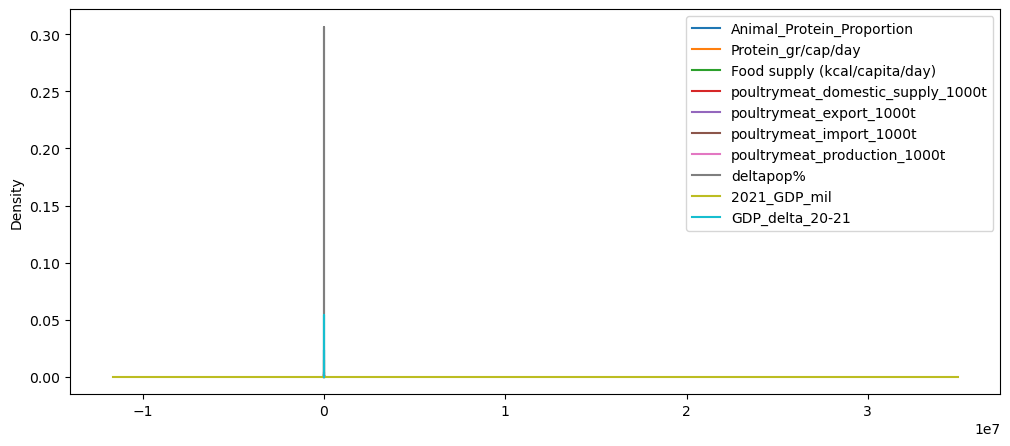

In [31]:
# Before scaling or standardizing the data
A1 = pd.DataFrame(data,columns=data.columns)

A1.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

<Axes: ylabel='Density'>

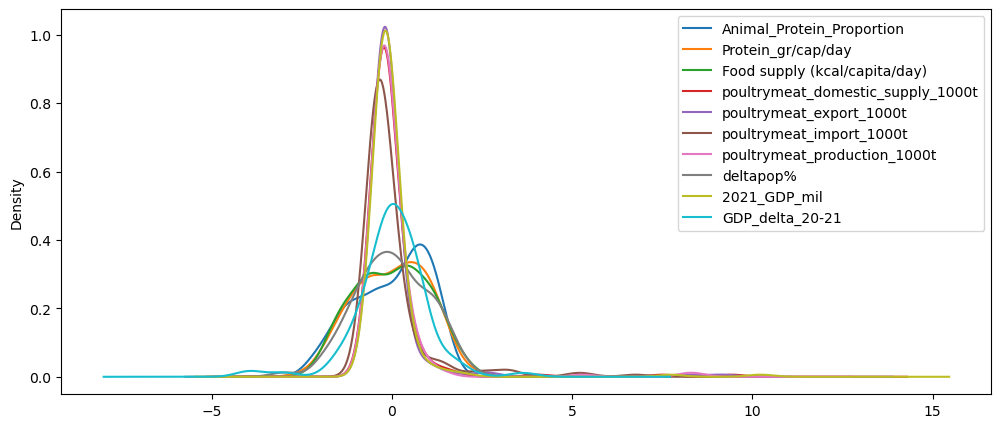

In [32]:
# After Standardizing the data. All the distributions are now centered around the 0 value and have a similar spread.
pd.DataFrame(x_scaled,columns=data.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

#### Perform PCA (principal component analysis)

In [33]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 10

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(x_scaled)

PCA(n_components=10)

In [34]:
pca.explained_variance_ratio_.round(2)

array([0.43, 0.27, 0.09, 0.09, 0.05, 0.04, 0.03, 0.01, 0.01, 0.  ])

In [35]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.43, 0.69, 0.79, 0.87, 0.92, 0.96, 0.98, 0.99, 1.  , 1.  ])

In [36]:
data.columns

Index(['Animal_Protein_Proportion', 'Protein_gr/cap/day',
       'Food supply (kcal/capita/day)', 'poultrymeat_domestic_supply_1000t',
       'poultrymeat_export_1000t', 'poultrymeat_import_1000t',
       'poultrymeat_production_1000t', 'deltapop%', '2021_GDP_mil',
       'GDP_delta_20-21'],
      dtype='object')

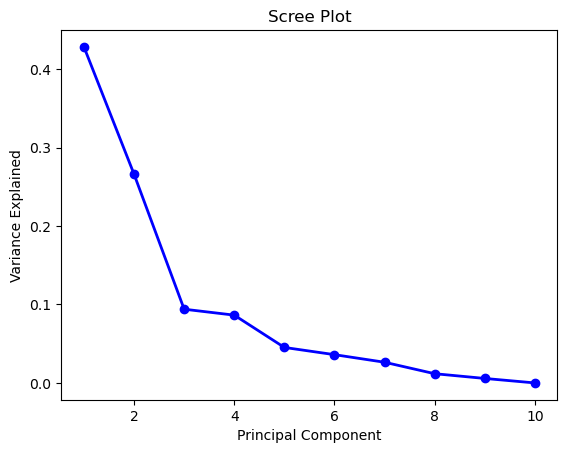

In [37]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [38]:
print(pca.explained_variance_ratio_)

[4.28309674e-01 2.66090886e-01 9.39882312e-02 8.64253525e-02
 4.52513513e-02 3.60445738e-02 2.63764229e-02 1.17684125e-02
 5.72819047e-03 1.69055762e-05]


# Analyze the Results

In [39]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]

In [40]:
data.columns

Index(['Animal_Protein_Proportion', 'Protein_gr/cap/day',
       'Food supply (kcal/capita/day)', 'poultrymeat_domestic_supply_1000t',
       'poultrymeat_export_1000t', 'poultrymeat_import_1000t',
       'poultrymeat_production_1000t', 'deltapop%', '2021_GDP_mil',
       'GDP_delta_20-21'],
      dtype='object')

In [41]:
pc1.round(2)

array([ 0.29,  0.33,  0.34,  0.38,  0.32,  0.26,  0.39, -0.26,  0.38,
        0.12])

In [42]:
pc2.round(2)

array([-0.4 , -0.38, -0.39,  0.35,  0.22,  0.11,  0.35,  0.34,  0.31,
       -0.16])

In [43]:
pc3.round(2)

array([-0.14, -0.05, -0.07,  0.06, -0.32,  0.38, -0.03,  0.14,  0.02,
        0.84])

In [44]:
pc4.round(2)

array([ 0.02, -0.01,  0.03, -0.01,  0.44, -0.73,  0.11,  0.17, -0.04,
        0.48])

PC1 Animal Protein Proportion Scores is 0.29 for PC2 Animal Protein Proportion scores -0.4.  
Clearly Animal Protein Proportion  is more influential on PC1 than PC2.

## Correlation Circle
####  Let us plot these component scores on a correlation circle (sometimes called a variables factor map) chart to make them easier to digest

#### Each plot is drawn on a factorial plane, that is the vector space made up of the intersection of two of the principal components.  First, we plot the component scores of PC1 against PC2:

In [45]:
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns

In [46]:
Z=linkage(x_scaled,"ward")
plt.figure(figsize=(15,10))
plt.axhline(9)
dendrogram(Z,labels=None)
#plt.savefig('Dendro.png', bbox_inches='tight')
plt.show()

NameError: name 'linkage' is not defined